<a href="https://colab.research.google.com/github/AkshayAbraham/LigandXplorer_bioinformatics/blob/main/LigandXplorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LigandXplore:** A Computational Pipeline for Early-Stage Drug Discovery

**Introduction**

Drug discovery is a complex and resource-intensive process that requires the identification and optimization of potential therapeutic molecules. LigandXplore is an innovative computational tool designed to assist researchers in the early-stage filtering of drug candidates by ranking, optimizing, and analyzing ligand structures.

**Key Features:**

* **Druglikeness Prediction:**  Assessing the potential of a molecule to become a successful drug using established rules like Lipinski's Rule of Five and Veber's criteria, as well as predicting key ADMET (Absorption, Distribution, Metabolism, Excretion, Toxicity) properties.
* **Molecular Optimization:** Employing a genetic algorithm to iteratively improve a molecule's structure, aiming to enhance its druglikeness and predicted ADMET profile.  This optimization process can be tailored to focus on specific properties or target interactions.
* **Interactive Visualization:** Generating interactive 3D visualizations of molecules with property maps, allowing researchers to explore the spatial distribution of key characteristics like lipophilicity and charge. This facilitates a deeper understanding of structure-property relationships.
* **Comparative Analysis:**  Comparing the properties and druglikeness scores of optimized molecules with commercially available drugs, providing valuable context and insights into their potential.

By integrating computational chemistry techniques with predictive modeling, LigandXplore provides a streamlined workflow for rational drug design, helping researchers make data-driven decisions faster and more efficiently.

Let’s get started with the ligand ranking process! 🚀

# **1. Installing Required Libraries**

This code block installs all the necessary Python libraries required for LigandXplore to function properly. If these libraries are already installed, you may skip this step.

**Libraries Included:**


*   RDKit – For molecular representations and cheminformatics.
*   admet-ai – For ADMET (Absorption, Distribution, Metabolism, Excretion, Toxicity) predictions.
*   pandas – For data handling and analysis.
*   tabulate – For displaying structured tables.
*   scikit-learn – For machine learning tasks.
*   DEAP – For evolutionary optimization and molecule enhancement.
*   py3Dmol & ipywidgets – For interactive 3D molecular visualization.

















In [1]:
# Install required libraries
!pip install rdkit
!pip install admet-ai
!pip install tabulate
!pip install --upgrade pandas
!pip install rdkit admet-ai pandas scikit-learn deap
!pip install py3Dmol ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 77.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
  

# **2. Uploading Ligand Files**

This code block allows users to upload their ligand files (.sdf format) to Google Colab for further processing. The uploaded files will be automatically moved to a designated folder (/content/ligands) to keep the workspace organized.

***Ensure that your ligand file is in the correct format (.sdf) before uploading.***

In [2]:
from google.colab import files
import os

# Create the folder where you want to save the .sdf file
folder_path = '/content/ligands'
os.makedirs(folder_path, exist_ok=True)

# Upload the file
uploaded = files.upload()

# Move the uploaded file to the specified folder
for filename in uploaded.keys():
    # Define the full path where you want to save the file
    destination = os.path.join(folder_path, filename)
    os.rename(filename, destination)

    print(f"File saved to: {destination}")


Saving Structure2D_COMPOUND_CID_36314.sdf to Structure2D_COMPOUND_CID_36314.sdf
Saving Conformer3D_COMPOUND_CID_3672.sdf to Conformer3D_COMPOUND_CID_3672.sdf
Saving Conformer3D_COMPOUND_CID_237.sdf to Conformer3D_COMPOUND_CID_237.sdf
Saving Conformer3D_COMPOUND_CID_162394460 - Copy.sdf to Conformer3D_COMPOUND_CID_162394460 - Copy.sdf
Saving Conformer3D_COMPOUND_CID_146502750.sdf to Conformer3D_COMPOUND_CID_146502750.sdf
Saving Structure2D_COMPOUND_CID_392622.sdf to Structure2D_COMPOUND_CID_392622.sdf
Saving Conformer3D_COMPOUND_CID_5757.sdf to Conformer3D_COMPOUND_CID_5757.sdf
Saving Conformer3D_COMPOUND_CID_2153.sdf to Conformer3D_COMPOUND_CID_2153.sdf
Saving Conformer3D_COMPOUND_CID_2244.sdf to Conformer3D_COMPOUND_CID_2244.sdf
Saving ligand_2153.sdf to ligand_2153.sdf
File saved to: /content/ligands/Structure2D_COMPOUND_CID_36314.sdf
File saved to: /content/ligands/Conformer3D_COMPOUND_CID_3672.sdf
File saved to: /content/ligands/Conformer3D_COMPOUND_CID_237.sdf
File saved to: /cont

# **3. Displaying Physicochemical & ADMET Properties of Ligands**

This section processes molecular data from SDF files, calculates key physicochemical properties, predicts ADMET (Absorption, Distribution, Metabolism, Excretion, Toxicity) properties and are displayed in a structured table and saved as a CSV file for further analysis.

In [4]:
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from admet_ai import ADMETModel
from tabulate import tabulate

# Define the folder containing SDF files
ligands_folder = "/content/ligands"

# Function to calculate molecular descriptors
def calculate_descriptors(mol):
    descriptors = {
        'Molecular Weight': Descriptors.MolWt(mol),
        'LogP': Descriptors.MolLogP(mol),
        'HBD': Descriptors.NumHDonors(mol),
        'HBA': Descriptors.NumHAcceptors(mol),
        'Rotatable Bonds': Descriptors.NumRotatableBonds(mol),
        'Polar Surface Area': Descriptors.TPSA(mol)
    }
    return descriptors

# Function to apply Lipinski's Rule of 5
def lipinski_rules(descriptors):
    return sum([
        descriptors['Molecular Weight'] <= 500,
        descriptors['LogP'] <= 5,
        descriptors['HBD'] <= 5,
        descriptors['HBA'] <= 10
    ])

# Function to apply Veber's Rule
def veber_rules(descriptors):
    return sum([
        descriptors['Rotatable Bonds'] <= 10,
        descriptors['Polar Surface Area'] <= 140
    ])

# Function to process all SDF files in the folder
def process_sdf_folder(folder_path):
    all_molecules = []

    # Loop through all .sdf files in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith(".sdf"):
            sdf_path = os.path.join(folder_path, filename)
            supplier = Chem.SDMolSupplier(sdf_path)

            for mol in supplier:
                if mol is not None:  # Skip invalid molecules
                    mol_name = mol.GetProp("_Name") if mol.HasProp("_Name") else "Unknown"
                    pubchem_id = mol.GetProp("PUBCHEM_COMPOUND_CID") if mol.HasProp("PUBCHEM_COMPOUND_CID") else "N/A"

                    # Get descriptors
                    descriptors = calculate_descriptors(mol)

                    # Apply Lipinski and Veber's rules
                    lipinski_score = lipinski_rules(descriptors)
                    veber_score = veber_rules(descriptors)

                    # Store molecule data
                    all_molecules.append({
                        'Molecule Name': mol_name,
                        'PubChem ID': pubchem_id,
                        'Molecular Weight': descriptors['Molecular Weight'],
                        'LogP': descriptors['LogP'],
                        'HBD': descriptors['HBD'],
                        'HBA': descriptors['HBA'],
                        'Rotatable Bonds': descriptors['Rotatable Bonds'],
                        'Polar Surface Area': descriptors['Polar Surface Area'],
                        'Lipinski Score': lipinski_score,
                        'Veber Score': veber_score,
                        'Total Drug-Like Score': lipinski_score + veber_score,
                        'SMILES': Chem.MolToSmiles(mol)  # Extract SMILES from the molecule
                    })

    return all_molecules

# Function to predict all ADMET properties
def predict_all_admet_properties(smiles_list):
    model = ADMETModel()
    preds = model.predict(smiles=smiles_list)

    # Insert the SMILES column for reference
    preds.insert(0, "SMILES", smiles_list)
    return preds

# Process the ligands folder and extract molecules
molecules_data = process_sdf_folder(ligands_folder)

# Convert molecule data into a DataFrame
df_drug_like = pd.DataFrame(molecules_data)

# Extract SMILES strings for ADMET prediction
smiles_list = df_drug_like['SMILES'].tolist()

# Predict ADMET properties
df_admet = predict_all_admet_properties(smiles_list)

# Merge drug-likeness and ADMET data
df_combined = pd.merge(df_drug_like, df_admet, on="SMILES", how="inner")

# Sort molecules based on 'Total Drug-Like Score'
df_sorted = df_combined.sort_values(by=['Total Drug-Like Score'], ascending=False)

# Save the sorted DataFrame as a CSV file
csv_filename = "/content/ADMETProperties_molecules.csv"
df_sorted.to_csv(csv_filename, index=False)

# Display the results as a table
print("\nRanked Molecules Based on Drug-Likeness and ADMET Properties:")
print(tabulate(df_sorted, headers="keys", tablefmt="pretty", showindex=False))

# Print success message
print(f"\n✅ Results have been saved as a CSV file: {csv_filename}")


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 24.33it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 22.02it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 


Ranked Molecules Based on Drug-Likeness and ADMET Properties:
+---------------+------------+--------------------+--------------------+-----+-----+-----------------+--------------------+----------------+-------------+-----------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+---------------------+-------------------------+----------------------+----------+---------------------+----------------+--------------------+-----------------------+---------------------+--------------------+----------------------+----------------------+--------------------------------+----------------------+--------------------------------+-----------------------+--------------------------------+------------------------+---------------------+-----------------------+---------------------+--------------------+------------------------+----------------------+------------

# 4. Ranking Ligands Based on Drug-**Likeness**

This section processes molecular structures from SDF files, computes essential physicochemical properties and ranks ligands based on their drug-likeness potential. The results are displayed in a structured format and saved as a CSV file for further analysis.

**Working Logic & Calculation Methods**

1️⃣ Extracting Molecular Data
The script scans the /content/ligands folder for SDF files containing molecular structures.
Each molecule's name, PubChem ID, and SMILES representation are extracted.

2️⃣ Computing Physicochemical Properties
Each ligand’s key descriptors are calculated using RDKit, including:

✔ Molecular Weight (MW)

*   LogP (Hydrophobicity)
*   Hydrogen Bond Donors (HBD) & Acceptors (HBA)
*   Rotatable Bonds (Flexibility)
*   Topological Polar Surface Area (TPSA)
*   Stereo Centers (Chirality Information)

3️⃣ Drug-Likeness Evaluation

The script applies two fundamental drug-likeness rules:

🔹 *Lipinski’s Rule of 5 (RO5)*

A molecule is considered "drug-like" if it meets at least three of these conditions:

1.   ✅ MW ≤ 500
2.   ✅ LogP ≤ 5
3.   ✅ HBD ≤ 5
2.   ✅ HBA ≤ 10



Lipinski Score Calculation:

*Lipinski Score = (MW≤500) + (LogP≤5) + (HBD≤5) + (HBA≤10)*

*(maximum score = 4)*

*🔹 Veber’s Rule*

A molecule is considered orally bioavailable if:

1.   ✅ Rotatable Bonds ≤ 10
2.   ✅ TPSA ≤ 140

Veber Score Calculation:

*Veber Score=(Rotatable Bonds≤10) + (TPSA≤140)*
*(maximum score = 2)*

*4️⃣ ADMET Property Prediction*

SMILES strings are extracted from molecules and passed into admet-ai. QED (Quantitative Estimation of Drug-Likeness) is extracted from the model's output.

*5️⃣ Total Drug-Like Score Calculation (VLQ Score)*

To rank molecules, the script calculates an overall Total Drug-Like Score (VLQ Score) as follows:

*VLQ Score = QED + Lipinski Score + Veber Score*

This score integrates:

✔ QED value (higher = more drug-like)
✔ Lipinski & Veber rule compliance

*6️⃣ Sorting & Saving Results*

Molecules are ranked in descending order based on their VLQ Score.The final ranked dataset is displayed in tabular format.
The results are saved as a CSV file (VLQ_score.csv).




In [5]:

import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from admet_ai import ADMETModel
from tabulate import tabulate

# Function to calculate descriptors
def calculate_descriptors(mol):
    descriptors = {}
    descriptors['Molecular Weight'] = Descriptors.MolWt(mol)
    descriptors['LogP'] = Descriptors.MolLogP(mol)
    descriptors['HBD'] = Descriptors.NumHDonors(mol)
    descriptors['HBA'] = Descriptors.NumHAcceptors(mol)
    descriptors['Rotatable Bonds'] = Descriptors.NumRotatableBonds(mol)
    descriptors['Polar Surface Area'] = Descriptors.TPSA(mol)
    descriptors['Stereo Centers'] = Chem.FindMolChiralCenters(mol, includeUnassigned=True)
    return descriptors

# Function to apply Lipinski's Rule of 5
def lipinski_rules(descriptors):
    rules = sum([
        descriptors['Molecular Weight'] <= 500,
        descriptors['LogP'] <= 5,
        descriptors['HBD'] <= 5,
        descriptors['HBA'] <= 10
    ])
    return rules

# Function to apply Veber's Rule
def veber_rules(descriptors):
    rules = sum([
        descriptors['Rotatable Bonds'] <= 10,
        descriptors['Polar Surface Area'] <= 140
    ])
    return rules

# Function to process SDF files and calculate descriptors
def process_sdf_from_folder(folder_path):
    all_molecules = []

    # List all .sdf files in the folder
    sdf_files = [f for f in os.listdir(folder_path) if f.endswith('.sdf')]

    for sdf_file in sdf_files:
        sdf_file_path = os.path.join(folder_path, sdf_file)
        supplier = Chem.SDMolSupplier(sdf_file_path)

        for mol in supplier:
            if mol is not None:  # Skip invalid molecules
                mol_name = mol.GetProp("_Name") if mol.HasProp("_Name") else "Unknown"
                pubchem_id = mol.GetProp("PUBCHEM_COMPOUND_CID") if mol.HasProp("PUBCHEM_COMPOUND_CID") else "N/A"

                # Get descriptors
                descriptors = calculate_descriptors(mol)

                # Apply Lipinski and Veber's rules
                lipinski_score = lipinski_rules(descriptors)
                veber_score = veber_rules(descriptors)

                # Store the data
                data = {
                    'Molecule Name': mol_name,
                    'PubChem ID': pubchem_id,
                    'SMILES': Chem.MolToSmiles(mol),
                    'Molecular Weight': descriptors['Molecular Weight'],
                    'LogP': descriptors['LogP'],
                    'tPSA': descriptors['Polar Surface Area'],
                    'Rotatable Bonds': descriptors['Rotatable Bonds'],
                    'Stereo Centers': len(descriptors['Stereo Centers']),
                    'HBD': descriptors['HBD'],
                    'HBA': descriptors['HBA'],
                    'Lipinski Score': lipinski_score,
                    'Veber Score': veber_score
                }
                all_molecules.append(data)

    return all_molecules

# Function to predict ADMET properties
def predict_admet(smiles_list):
    model = ADMETModel()
    preds = model.predict(smiles=smiles_list)

    # Ensure SMILES column is present
    preds.insert(0, "SMILES", smiles_list)

    # Extract specific properties of interest
    selected_columns = ["SMILES", "QED"]

    # Ensure only available columns are selected
    preds = preds[[col for col in selected_columns if col in preds.columns]]

    return preds

# Define the folder path where your SDF files are stored
folder_path = '/content/ligands'

# Process the SDF files from the folder and get the data
molecules_data = process_sdf_from_folder(folder_path)

# Create a DataFrame for drug-likeness scores
df_drug_like = pd.DataFrame(molecules_data)

# Extract SMILES strings for ADMET prediction
smiles_list = df_drug_like['SMILES'].tolist()

# Predict ADMET properties
df_admet = predict_admet(smiles_list)

# Merge drug-likeness and ADMET data
df_combined = pd.merge(df_drug_like, df_admet, on="SMILES", how="inner")

# Calculate Total Drug-Like Score as the sum of QED, Lipinski Score, and Veber Score
df_combined['Total Drug-Like Score'] = df_combined['QED'] + df_combined['Lipinski Score'] + df_combined['Veber Score']

# Sort molecules based on 'Total Drug-Like Score'
df_sorted_VLQscore = df_combined.sort_values(by=['Total Drug-Like Score'], ascending=False)

# Display the results in a table format
print("Ranked Molecules Based on Drug-Likeness score:")
print(tabulate(df_sorted_VLQscore, headers="keys", tablefmt="pretty", showindex=False))

# Ensure columns are valid before saving
df_sorted_VLQscore.columns = [str(col) for col in df_sorted_VLQscore.columns]

# Now try saving the DataFrame to CSV
df_sorted_VLQscore.to_csv('/content/VLQ_score.csv', index=False)

print("CSV file saved successfully to /content/VLQ_score.csv")




/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 24.41it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 22.39it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Ranked Molecules Based on Drug-Likeness score:
+---------------+------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+--------------------+--------------------+-----------------+----------------+-----+-----+----------------+-------------+---------------------+-----------------------+
| Molecule Name | PubChem ID |                                                                              SMILES                                                                              |  Molecular Weight  |        LogP        |        tPSA        | Rotatable Bonds | Stereo Centers | HBD | HBA | Lipinski Score | Veber Score |         QED         | Total Drug-Like Score |
+---------------+------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------

# 5. **Ranking** Ligands Based on ADMET Properties

This section analyzes ligand ADMET properties (Absorption, Distribution, Metabolism, Excretion, and Toxicity) by:


1.   Extracting molecular data from SDF files.
2.   Predicting ADMET properties using admet-ai.
2.   Normalizing ADMET scores for fair comparison.
2.   Calculating category-wise ADMET scores.
2.   Ranking ligands based on overall ADMET performance.
2.   Saving ranked molecules in a CSV file for further analysis.

---



**🚀 Working Logic & Calculation Methods**

1️⃣ Extracting Molecular Information

The script scans the /content/ligands folder for SDF files containing molecular structures.

2️⃣ ADMET Property Prediction

The extracted SMILES strings are input into the ADMETModel to predict:

✔ Absorption (Bioavailability, Solubility, Lipophilicity, etc.)

✔ Distribution (Plasma Binding, BBB Penetration, etc.
)
✔ Metabolism (CYP Enzyme Interactions, Half-life, etc.)

✔ Excretion (Clearance, P-gp Interaction, etc.)

✔ Toxicity (AMES Test, Carcinogenicity, hERG Inhibition, etc.)

The output includes numerical scores for each ADMET property.

3️⃣ Normalization of ADMET Properties
Raw ADMET values are normalized using Min-Max Scaling to bring them into a 0-1 range:

*Normalized Value = Value−Min / Max−Min*

This ensures fair ranking, avoiding bias due to different property scales.


4️⃣ ADMET Category Scores Calculation

For each ADMET category (Absorption, Distribution, Metabolism, Excretion, Toxicity), an average score is calculated:

*Category Score = ∑(Normalized ADMET Properties in Category)/Number of Properties in Category*

5️⃣ Overall ADMET Score & Ranking

The Overall ADMET Score is computed as the average of all category scores:

*Overall ADMET Score = ∑(Absorption, Distribution, Metabolism, Excretion, Toxicity Scores)/5*

 ✔ Higher scores indicate better pharmacokinetic & safety profiles.

✔ Molecules are ranked in descending order based on the Overall ADMET Score.

6️⃣ Saving & Displaying Results

Ranked ADMET data is displayed in tabular format.
Top-scoring molecules can be selected for further drug development.

Results are saved as:

✅ Raw ADMET Predictions → /content/ADMET_Predictions.csv

✅ Normalized & Ranked ADMET Scores → /content/Normalized_ADMET_Scores.csv


In [6]:
import os
import pandas as pd
from rdkit import Chem
from admet_ai import ADMETModel
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

# Define the ADMET properties categorized by ADMET classification
admet_categories = {
    "Absorption": ["Bioavailability_Ma", "HIA_Hou", "Caco2_Wang", "AMPA_NCATS", "HydrationFreeEnergy_FreeSolv", "Lipophilicity_AstraZeneca", "PPBR_AZ", "Solubility_AqSolDB"],
    "Distribution": ["PPBR_AZ", "VDss_Lombardo", "BBB_Martins", "Solubility_AqSolDB", "Lipophilicity_AstraZeneca"],
    "Metabolism": ["CYP1A2_Veith", "CYP2C19_Veith", "CYP2C9_Veith", "CYP2D6_Veith", "CYP3A4_Veith", "CYP2C9_Substrate_CarbonMangels", "CYP2D6_Substrate_CarbonMangels", "CYP3A4_Substrate_CarbonMangels", "Clearance_Hepatocyte_AZ", "Half_Life_Obach"],
    "Excretion": ["Clearance_Hepatocyte_AZ", "Half_Life_Obach", "Pgp_Broccatelli"],
    "Toxicity": ["AMES", "Carcinogens_Lagunin", "ClinTox", "DILI", "NR-AR-LBD", "NR-AhR", "NR-Aromatase",
                 "NR-ER-LBD", "NR-ER", "NR-PPAR-gamma", "SR-ARE", "SR-ATAD5", "SR-HSE", "SR-MMP", "Skin_Reaction", "hERG", "LD50_Zhu"]
}

# Flatten list of all ADMET properties
admet_columns = [prop for category in admet_categories.values() for prop in category]

# Function to process SDF files and extract molecular information
def process_sdf_from_folder(folder_path):
    all_molecules = []
    sdf_files = [f for f in os.listdir(folder_path) if f.endswith('.sdf')]

    for sdf_file in sdf_files:
        sdf_file_path = os.path.join(folder_path, sdf_file)
        supplier = Chem.SDMolSupplier(sdf_file_path)

        for mol in supplier:
            if mol is not None:
                mol_name = mol.GetProp("_Name") if mol.HasProp("_Name") else "Unknown"
                pubchem_id = mol.GetProp("PUBCHEM_COMPOUND_CID") if mol.HasProp("PUBCHEM_COMPOUND_CID") else "N/A"
                smiles = Chem.MolToSmiles(mol)

                all_molecules.append({"Molecule Name": mol_name, "PubChem ID": pubchem_id, "SMILES": smiles})

    return pd.DataFrame(all_molecules)

# Function to predict ADMET properties
def predict_admet(smiles_list):
    model = ADMETModel()
    preds = model.predict(smiles=smiles_list)

    # Keep only relevant ADMET columns
    preds = preds[[col for col in admet_columns if col in preds.columns]]
    preds.insert(0, "SMILES", smiles_list)
    return preds

# Define the folder path where SDF files are stored
folder_path = '/content/ligands'

# Process the SDF files
df_molecules = process_sdf_from_folder(folder_path)

# Predict ADMET properties
df_admet = predict_admet(df_molecules['SMILES'].tolist())

# Merge molecular info with ADMET predictions
df_combined = pd.merge(df_molecules, df_admet, on="SMILES", how="inner")

# Display the ADMET predictions table
print("ADMET Predictions:")
print(tabulate(df_combined, headers="keys", tablefmt="pretty", showindex=False))

# Save predicted results to a CSV file
predicted_csv_path = "/content/ADMET_Predictions.csv"
df_combined.to_csv(predicted_csv_path, index=False)
print(f"Predicted results saved successfully to {predicted_csv_path}")

# Normalize ADMET properties
scaler = MinMaxScaler()

# Filter admet_existing_columns to include only columns present in df_combined
admet_existing_columns = [col for col in admet_columns if col in df_combined.columns]

# Rename duplicate columns to make them unique
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]  # Remove duplicates first
for col in df_combined.columns:
    if df_combined.columns.tolist().count(col) > 1:  # Check if column is duplicated
        df_combined.rename(columns={col: f"{col}_1"}, inplace=True)  # Rename the first occurrence
        df_combined.rename(columns={col: f"{col}_2"}, inplace=True)  # Rename the second occurrence

# Debug: Print columns to verify
print("Columns in df_combined (after renaming duplicates):", df_combined.columns.tolist())
print("Columns in admet_existing_columns:", admet_existing_columns)

# Verify the shape of the data being normalized
print("Shape of df_combined[admet_existing_columns]:", df_combined[admet_existing_columns].shape)

# Normalize the data
df_norm = pd.DataFrame(scaler.fit_transform(df_combined[admet_existing_columns]), columns=admet_existing_columns)

# Combine normalized scores with molecule info
df_normalized = pd.concat([df_combined[['Molecule Name', 'PubChem ID', 'SMILES']], df_norm], axis=1)

# Calculate ADMET category scores
for category, properties in admet_categories.items():
    existing_props = [prop for prop in properties if prop in df_norm.columns]
    if existing_props:  # Only calculate if there are existing properties
        df_normalized[f"{category} Score"] = df_norm[existing_props].mean(axis=1)
    else:
        df_normalized[f"{category} Score"] = 0  # Default score if no properties exist

# Compute overall ADMET Score as the mean of the category scores
df_normalized["Overall ADMET Score"] = df_normalized[[f"{cat} Score" for cat in admet_categories]].mean(axis=1)

# Rank molecules based on the Overall ADMET Score
df_ranked = df_normalized.sort_values(by=["Overall ADMET Score"], ascending=False)

# Display normalized results in a table format
print("Normalized ADMET Results:")
print(tabulate(df_ranked, headers="keys", tablefmt="pretty", showindex=False))

# Save normalized results to a CSV file
normalized_csv_path = "/content/Normalized_ADMET_Scores.csv"
df_ranked.to_csv(normalized_csv_path, index=False)
print(f"Normalized results saved successfully to {normalized_csv_path}")

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 26.27it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  40%|████      | 2/5 [00:00<00:00, 18.71it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 18.38it/s]

  0%|          | 0/1 [00:0

ADMET Predictions:
+---------------+------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+--------------------+---------------------+------------------------------+---------------------------+--------------------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------------+----------------------+----------------------+----------------------+-----------------------+------------------------+--------------------------------+--------------------------------+--------------------------------+-------------------------+---------------------+-------------------------+---------------------+-----------------------+-----------------------+---------------------+-----------------------+---------------------+------------------------+-----------------------+-----------------------+-----

# **6. Optimizing Ligand Structure for ADMET Properties Using Genetic Algorithm**

This sectionk provides a framework for optimizing the molecular structure of a ligand to enhance specific ADMET (Absorption, Distribution, Metabolism, Excretion, and Toxicity) properties using a genetic algorithm (GA). The process involves applying various mutation operations to the molecular structure (SMILES format) and evaluating the optimized molecules based on their predicted ADMET properties.

Users can specify the ADMET property they want to optimize by selecting from the properties listed in the provided .txt file. The default target property in this notebook is Lipophilicity (AstraZeneca model), but users can modify it as needed.

---

**Mutation Operators and Their Working Logic**

A mutation operator introduces structural changes to a molecule, which helps explore new chemical variants. Below are the mutation operators used in this notebook:

1. *Atom Deletion* - Removes a random atom from the molecule while maintaining chemical validity.
2. Atom Insertion - Adds a new carbon, nitrogen, or oxygen atom and connects it to a random existing atom.
3. *Bond Order Modification* - Changes a randomly selected bond type (single ↔ double, double ↔ triple).
4. *Substructure Replacement* - Replaces specific functional groups (e.g., hydroxyl groups with amines, methyl groups with chlorine).
5. *Ring Modification* - Breaks a randomly selected ring in the molecule, potentially altering its pharmacokinetic properties.
6. *Atom Swapping* - Exchanges the atomic identities of two randomly chosen atoms (e.g., swapping carbon and nitrogen).
7. *Stereochemistry Alteration* - Flips the chirality of a randomly chosen chiral center in the molecule.


Each mutation operator generates a new molecular structure, which is then assessed using the ADMET prediction model. The GA iteratively selects and refines structures with improved ADMET properties over multiple generations, optimizing the molecular design for better drug-like characteristics.

In [7]:
import random
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from deap import base, creator, tools, algorithms
from admet_ai import ADMETModel

# Define the target ADMET property to optimize
target_property = "Lipophilicity_AstraZeneca"  # Change if needed

# Prompt user for the initial ligand SMILES
initial_smiles = input("Enter the SMILES of the ligand to enhance: ")

# Global list to store mutation details (operator used, mutated SMILES, predicted lipophilicity)
mutation_results = []

# -----------------------------------------------------------------------------
# Helper Function: Check if a SMILES corresponds to a chemically valid molecule
def is_valid_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return False
    try:
        Chem.SanitizeMol(mol)
        return True
    except Exception as e:
        print(f"Sanitization failed: {e}")
        return False

# -----------------------------------------------------------------------------
# Mutation Operator 1: Atom Deletion
def mutate_atom_deletion(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None or mol.GetNumAtoms() < 2:  # Avoid deleting if only one atom
        return None
    rw_mol = Chem.RWMol(mol)
    atom_idx = random.randint(0, rw_mol.GetNumAtoms() - 1)
    rw_mol.RemoveAtom(atom_idx)
    return rw_mol

# Mutation Operator 2: Atom Insertion (Addition)
def mutate_atom_insertion(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    rw_mol = Chem.RWMol(mol)
    # Choose a random atom to attach the new atom
    idx = random.randint(0, rw_mol.GetNumAtoms() - 1)
    # Choose a new atom type from a simple allowed set (can be extended)
    new_atom_symbol = random.choice(["C", "N", "O"])
    new_atom = Chem.Atom(new_atom_symbol)
    new_idx = rw_mol.AddAtom(new_atom)
    # Attach the new atom via a single bond
    rw_mol.AddBond(idx, new_idx, Chem.BondType.SINGLE)
    return rw_mol

# Mutation Operator 3: Bond Order Modification
def mutate_bond_order_modification(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None or mol.GetNumBonds() == 0:
        return None
    rw_mol = Chem.RWMol(mol)
    bond_idx = random.randint(0, rw_mol.GetNumBonds() - 1)
    bond = rw_mol.GetBondWithIdx(bond_idx)
    current_order = bond.GetBondType()
    # Toggle between single and double (or modify triple bonds slightly)
    if current_order == Chem.BondType.SINGLE:
        new_order = Chem.BondType.DOUBLE
    elif current_order == Chem.BondType.DOUBLE:
        new_order = Chem.BondType.SINGLE
    elif current_order == Chem.BondType.TRIPLE:
        new_order = Chem.BondType.DOUBLE
    else:
        new_order = Chem.BondType.SINGLE
    bond.SetBondType(new_order)
    return rw_mol

# Mutation Operator 4: Substructure Replacement
def mutate_substructure_replacement(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    # Example 1: Replace a hydroxyl group (-OH) with an amine (-NH2)
    hydroxyl_smarts = "[OX2H]"  # Hydroxyl group
    hydroxyl = Chem.MolFromSmarts(hydroxyl_smarts)
    amine = Chem.MolFromSmiles("N")  # Simple amine fragment
    if mol.HasSubstructMatch(hydroxyl):
        mutated = Chem.ReplaceSubstructs(mol, hydroxyl, amine, replaceAll=True)
        if mutated:
            return mutated[0]
    # Example 2: Replace a methyl group with chlorine
    methyl_smarts = "[CH3]"
    methyl = Chem.MolFromSmarts(methyl_smarts)
    chlorine = Chem.MolFromSmiles("Cl")
    if mol.HasSubstructMatch(methyl):
        mutated = Chem.ReplaceSubstructs(mol, methyl, chlorine, replaceAll=True)
        if mutated:
            return mutated[0]
    return None

# Mutation Operator 5: Ring Modification
def mutate_ring_modification(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    ring_info = mol.GetRingInfo()
    if not ring_info.NumRings():
        return None
    rings = ring_info.AtomRings()
    selected_ring = random.choice(rings)
    if len(selected_ring) < 2:
        return None
    # Find bonds in the selected ring
    bond_indices = []
    for i in range(len(selected_ring)):
        a1 = selected_ring[i]
        a2 = selected_ring[(i + 1) % len(selected_ring)]
        bond = mol.GetBondBetweenAtoms(a1, a2)
        if bond:
            bond_indices.append(bond.GetIdx())
    if not bond_indices:
        return None
    bond_to_break = random.choice(bond_indices)
    rw_mol = Chem.RWMol(mol)
    bond = rw_mol.GetBondWithIdx(bond_to_break)
    idx1 = bond.GetBeginAtomIdx()
    idx2 = bond.GetEndAtomIdx()
    rw_mol.RemoveBond(idx1, idx2)
    return rw_mol

# Mutation Operator 6: Atom Swapping
def mutate_atom_swapping(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None or mol.GetNumAtoms() < 2:
        return None
    rw_mol = Chem.RWMol(mol)
    idx1, idx2 = random.sample(range(rw_mol.GetNumAtoms()), 2)
    atom1 = rw_mol.GetAtomWithIdx(idx1)
    atom2 = rw_mol.GetAtomWithIdx(idx2)
    # Swap the atomic numbers (i.e., swap element types)
    num1 = atom1.GetAtomicNum()
    num2 = atom2.GetAtomicNum()
    atom1.SetAtomicNum(num2)
    atom2.SetAtomicNum(num1)
    return rw_mol

# Mutation Operator 7: Stereochemistry Alteration
def mutate_stereochemistry_alteration(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    rw_mol = Chem.RWMol(mol)
    chiral_centers = Chem.FindMolChiralCenters(rw_mol, includeUnassigned=True)
    if not chiral_centers:
        return None
    # Randomly pick one chiral center and flip its configuration
    center_idx, current_config = random.choice(chiral_centers)
    atom = rw_mol.GetAtomWithIdx(center_idx)
    if atom.GetChiralTag() == Chem.CHI_TETRAHEDRAL_CW:
        atom.SetChiralTag(Chem.CHI_TETRAHEDRAL_CCW)
    elif atom.GetChiralTag() == Chem.CHI_TETRAHEDRAL_CCW:
        atom.SetChiralTag(Chem.CHI_TETRAHEDRAL_CW)
    Chem.AssignStereochemistry(rw_mol, force=True, cleanIt=True)
    return rw_mol

# List of mutation operators (name, function)
mutation_operators = [
    ("Atom Deletion", mutate_atom_deletion),
    ("Atom Insertion", mutate_atom_insertion),
    ("Bond Order Modification", mutate_bond_order_modification),
    ("Substructure Replacement", mutate_substructure_replacement),
    ("Ring Modification", mutate_ring_modification),
    ("Atom Swapping", mutate_atom_swapping),
    ("Stereochemistry Alteration", mutate_stereochemistry_alteration)
]

# -----------------------------------------------------------------------------
# Prompt the user to select a mutation operator
print("\nAvailable mutation operators:")
for i, (op_name, _) in enumerate(mutation_operators, start=1):
    print(f"{i}: {op_name}")
print("0: Random selection (default)")
operator_choice_input = input("Enter the number of the mutation operator to use (0 for random): ")
try:
    operator_choice = int(operator_choice_input)
except:
    operator_choice = 0

# -----------------------------------------------------------------------------
# ADMET Prediction Function
def predict_admet(smiles_list):
    model = ADMETModel()
    # Ensure at least two SMILES are provided for robustness.
    if len(smiles_list) == 1:
        smiles_list = smiles_list * 2
    preds = model.predict(smiles=smiles_list)
    if not isinstance(preds, pd.DataFrame):
        print("Warning: predict_admet did not return a DataFrame.")
        return pd.DataFrame()
    return preds

# -----------------------------------------------------------------------------
# Master Mutation Function: now chooses the operator based on user input (if provided)
def mutate_smiles(smiles):
    # Use user-selected operator if valid; otherwise, use random selection
    if operator_choice == 0:
        operator_name, operator_func = random.choice(mutation_operators)
    else:
        if 1 <= operator_choice <= len(mutation_operators):
            operator_name, operator_func = mutation_operators[operator_choice - 1]
        else:
            operator_name, operator_func = random.choice(mutation_operators)

    mutated_mol = operator_func(smiles)
    if mutated_mol is None:
        print(f"Mutation operator '{operator_name}' failed. Returning original SMILES.")
        return smiles
    mutated_smiles = Chem.MolToSmiles(mutated_mol)
    if not is_valid_molecule(mutated_smiles):
        print(f"Mutated SMILES from '{operator_name}' is chemically invalid. Returning original SMILES.")
        return smiles
    preds = predict_admet([mutated_smiles])
    if not preds.empty and target_property in preds.columns:
        predicted_value = preds[target_property].iloc[0]
    else:
        predicted_value = "N/A"
    print(f"Mutation Operator: {operator_name}")
    print(f"Mutated SMILES: {mutated_smiles}")
    print(f"Predicted {target_property}: {predicted_value}\n")

    # Save the mutation details in the global list
    mutation_results.append({
        'Mutation Operator': operator_name,
        'Mutated SMILES': mutated_smiles,
        'Predicted Lipophilicity': predicted_value
    })

    return mutated_smiles

# -----------------------------------------------------------------------------
# Evaluation Function for the GA (uses ADMET predictions as fitness)
def evaluate(individual):
    smiles = individual[0]
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"Warning: Invalid SMILES: {smiles}. Fitness set to -1.0.")
        return (-1.0,)
    preds = predict_admet([smiles])
    if not isinstance(preds, pd.DataFrame) or preds.empty:
        print("Warning: No valid predictions received. Fitness set to 0.0.")
        return (0.0,)
    if target_property not in preds.columns:
        print(f"Warning: Target property '{target_property}' not found. Fitness set to 0.0.")
        return (0.0,)
    try:
        fitness_value = float(preds[target_property].iloc[0])
        return (fitness_value,)
    except Exception as e:
        print(f"Error accessing target property value: {e}. Fitness set to 0.0.")
        return (0.0,)

# -----------------------------------------------------------------------------
# GA Setup using DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
# Initialize individuals with the user-provided SMILES string.
toolbox.register("attr_smiles", lambda: initial_smiles)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_smiles, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Crossover operator is not used (each individual is a single SMILES string)
def mate_operator(ind1, ind2):
    return ind1, ind2
toolbox.register("mate", mate_operator)

# Mutation operator: updates the individual's SMILES using our master mutation function.
def mutate_operator(individual):
    individual[0] = mutate_smiles(individual[0])
    return (individual,)
toolbox.register("mutate", mutate_operator)

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# -----------------------------------------------------------------------------
# Run the Genetic Algorithm
def run_ga():
    pop = toolbox.population(n=10)  # Population size
    hof = tools.HallOfFame(1)         # To keep track of the best individual
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("max", np.max)

    # Run the GA for 5 generations with a high mutation probability.
    algorithms.eaSimple(pop, toolbox, cxpb=0.0, mutpb=0.8, ngen=5,
                         stats=stats, halloffame=hof, verbose=True)

    best_ind = hof[0]
    print("Best molecule:", best_ind[0])
    return best_ind[0]

if __name__ == "__main__":
    best_smiles = run_ga()
    print("Optimized SMILES:", best_smiles)

    # Create a DataFrame from the mutation results
    df_results = pd.DataFrame(mutation_results)

    # Print the table
    print("\nAll chemically feasible mutations generated:")
    print(df_results.to_string(index=False))

    # Save the data as a CSV file
    df_results.to_csv("mutation_results.csv", index=False)
    print("\nResults saved as 'mutation_results.csv'.")


Enter the SMILES of the ligand to enhance: CC(=O)O[C@H]1C(=O)[C@@]2(C)[C@H]([C@H](OC(=O)c3ccccc3)[C@]3(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c4ccccc4)c4ccccc4)C(C)=C1C3(C)C)[C@]1(OC(C)=O)CO[C@@H]1C[C@@H]2O

Available mutation operators:
1: Atom Deletion
2: Atom Insertion
3: Bond Order Modification
4: Substructure Replacement
5: Ring Modification
6: Atom Swapping
7: Stereochemistry Alteration
0: Random selection (default)
Enter the number of the mutation operator to use (0 for random): 0


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.99it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 32.45it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 38.13it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 35.83it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 36.75it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 35.31it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 32.30it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 33.70it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 32.95it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.83it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.85it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 33.17it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.93it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 24.90it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 33.23it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 26.70it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 34.03it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.55it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 26.16it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 24.26it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

gen	nevals	avg    	max    
0  	10    	2.59154	2.59154
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readou

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.65it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 23.57it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Stereochemistry Alteration
Mutated SMILES: CC(=O)O[C@H]1C(=O)[C@]2(C)[C@H]([C@H](OC(=O)c3ccccc3)[C@]3(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c4ccccc4)c4ccccc4)C(C)=C1C3(C)C)[C@]1(OC(C)=O)CO[C@@H]1C[C@@H]2O
Predicted Lipophilicity_AstraZeneca: 2.5651896011993918



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 33.38it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 32.97it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Bond Order Modification
Mutated SMILES: CC(=O)O[C@H]1C(=O)[C@@]2(C)[C@H]([C@H](OC(=O)c3ccccc3)[C@]3(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c4ccccc4)c4ccccc4)C(C)=C1C3(C)C)[C@]1(OC(C)=O)CO[C@@H]1C[C@@H]2O
Predicted Lipophilicity_AstraZeneca: 2.5915405640321625

Mutated SMILES from 'Atom Deletion' is chemically invalid. Returning original SMILES.


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.31it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.66it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Ring Modification
Mutated SMILES: CC(=O)O[C@H]1C(=O)[C@@]2(C)[C@H]([C@H](OC(=O)c3ccccc3)[C@]3(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c4ccccc4)c4ccccc4)C(C)=C1C3(C)C)[C@@](C)(OC(C)=O)[C@H](O)C[C@@H]2O
Predicted Lipophilicity_AstraZeneca: 2.590862197364279



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.93it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 22.88it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Atom Swapping
Mutated SMILES: CC(=O)O[C@H]1C(=O)[C@@]2(C)[C@H]([C@H](OC(=O)c3ccccc3)[C@]3(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c4ccccc4)c4ccccc4)C(C)=C1C3(C)C)[C@]1(OC(C)=O)CO[C@@H]1C[C@@H]2O
Predicted Lipophilicity_AstraZeneca: 2.5915405640321625



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 23.20it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.58it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Substructure Replacement
Mutated SMILES: CC(=O)O[C@H]1C(=O)[C@]2(C)[C@H](N)C[C@H]3OC[C@@]3(OC(C)=O)[C@H]2[C@H](OC(=O)c2ccccc2)[C@]2(N)C[C@H](OC(=O)[C@@H](N)[C@@H](NC(=O)c3ccccc3)c3ccccc3)C(C)=C1C2(C)C
Predicted Lipophilicity_AstraZeneca: 1.9332146997090818



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.09it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.49it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Atom Swapping
Mutated SMILES: CC(=O)O[C@H]1C(=O)[C@@]2(C)[C@H]([C@H](NC(=O)c3ccccc3)[C@]3(O)C[C@H](OC(=O)[C@H](O)[C@@H](OC(=O)c4ccccc4)c4ccccc4)C(C)=C1C3(C)C)[C@]1(OC(C)=O)CO[C@@H]1C[C@@H]2O
Predicted Lipophilicity_AstraZeneca: 2.5826164106661977



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.39it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 26.45it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Bond Order Modification
Mutated SMILES: CC(=O)O[C@H]1C(=O)[C@@]2(C)[C@H]([C@H](OC(=O)c3ccccc3)[C@]3(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c4ccccc4)c4ccccc4)C(C)=C1C3(C)C)[C@]1(OC(C)=O)CO[C@@H]1C[C@@H]2O
Predicted Lipophilicity_AstraZeneca: 2.5915405640321625



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.83it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.61it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Atom Deletion
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@@]1(C)[C@H](COC(=O)c2ccccc2)[C@]2(OC(C)=O)CO[C@@H]2C[C@@H]1O)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 2.899766333139005

Mutated SMILES from 'Bond Order Modification' is chemically invalid. Returning original SMILES.


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.99it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.12it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 24.49it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.03it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 23.84it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 24.76it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.33it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.96it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.69it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  40%|████      | 2/5 [00:00<00:00,  9.17it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00,  8.73it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|███

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.07it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.98it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.29it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 25.98it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.39it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 21.31it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 24.97it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.78it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.46it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.12it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

1  	10    	2.55294	2.89977


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.89it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 33.27it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Bond Order Modification
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@@]1(C)[C@H](COC(=O)c2ccccc2)[C@]2(OC(C)=O)CO[C@@H]2C[C@@H]1O)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 2.899766333139005



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 32.19it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.56it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Atom Swapping
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@@]1(C)[C@H](COC(=O)c2ccccc2)[C@]2(OC(C)=O)CO[C@@H]2C[C@@H]1O)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 2.899766333139005

Mutated SMILES from 'Bond Order Modification' is chemically invalid. Returning original SMILES.


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 26.37it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.39it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Atom Deletion
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@@]1(C)[C@H](CO)[C@]2(OC(C)=O)CO[C@@H]2C[C@@H]1O)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C.O.O.c1ccccc1
Predicted Lipophilicity_AstraZeneca: 2.6587998165174236



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 29.14it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 21.73it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Atom Deletion
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@@]1(C)[C@H](COCc2ccccc2)[C@]2(OC(C)=O)CO[C@@H]2C[C@@H]1O)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 3.0489380170496325

Mutated SMILES from 'Bond Order Modification' is chemically invalid. Returning original SMILES.
Mutated SMILES from 'Atom Swapping' is chemically invalid. Returning original SMILES.


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 24.02it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.79it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Atom Deletion
Mutated SMILES: C.CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@](C)(C(=O)[C@H](O)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C)[C@@H]2COC(=O)c1ccccc1.O.O
Predicted Lipophilicity_AstraZeneca: 2.7037459444592296



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.60it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 22.67it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.34it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.67it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.06it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 32.27it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 34.68it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.27it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 32.62it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.66it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 32.93it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 33.42it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.85it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.20it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.74it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 33.22it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

2  	8     	2.71687	3.04894
Mutated SMILES from 'Atom Swapping' is chemically invalid. Returning original SMILES.


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.16it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.08it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Atom Swapping
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@@]1(C)[C@H](COC(=O)c2ccccc2)[C@]2(OC(C)=O)CO[C@@H]2C[C@@H]1O)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 2.899766333139005

Mutated SMILES from 'Bond Order Modification' is chemically invalid. Returning original SMILES.


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.83it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.82it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Stereochemistry Alteration
Mutated SMILES: CC(=O)O[C@H]1C(=O)[C@@]2(C)[C@H]([C@@H](OC(=O)c3ccccc3)[C@]3(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c4ccccc4)c4ccccc4)C(C)=C1C3(C)C)[C@]1(OC(C)=O)CO[C@@H]1C[C@@H]2O
Predicted Lipophilicity_AstraZeneca: 2.6116831709050974



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.59it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.67it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Atom Insertion
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@@]1(C)[C@H](COCc2ccccc2)[C@]2(OC(C)=O)CO[C@@H]2C[C@@H]1O)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1cccc(C)c1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 3.1722188191682354



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.60it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 26.21it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Substructure Replacement
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@]1(C)[C@H](N)C[C@H]2OC[C@@]2(OC(C)=O)[C@H]1COC(=O)c1ccccc1)C(=C(C)[C@H](C)OC(=O)[C@@H](N)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 2.28245440663882

Mutated SMILES from 'Ring Modification' is chemically invalid. Returning original SMILES.


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.14it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 33.73it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.57it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.31it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.96it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 33.44it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.62it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.78it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 25.75it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.94it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 29.99it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.48it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 26.80it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.90it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

3  	7     	2.75277	3.17222


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.48it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.82it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Atom Swapping
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@@]1(C)[C@H](COCc2ccccc2)[C@]2(OC(C)=O)CO[C@@H]2C[C@@H]1O)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1cccc(C)c1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 3.1722188191682354

Mutated SMILES from 'Atom Deletion' is chemically invalid. Returning original SMILES.


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 25.78it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 23.15it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Substructure Replacement
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@]1(C)[C@H](N)C[C@H]2OC[C@@]2(OC(C)=O)[C@H]1COCc1ccccc1)C(=C(C)[C@H](C)OC(=O)[C@@H](N)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 2.4490575919455644



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.25it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.77it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Bond Order Modification
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@@]1(C)[C@H](COC(=O)c2ccccc2)[C@]2(OC(C)=O)CO[C@@H]2C[C@@H]1O)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 2.899766333139005



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.69it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.87it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Stereochemistry Alteration
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@@]1(C)[C@H](COCc2ccccc2)[C@]2(OC(C)=O)CO[C@@H]2C[C@@H]1O)C(=C(C)[C@@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 3.0501066888038673

Mutated SMILES from 'Ring Modification' is chemically invalid. Returning original SMILES.


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.10it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.03it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Atom Deletion
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@]1(C)[C@@H](O)CC[C@](C)(OC(C)=O)[C@H]1COCc1ccccc1)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1cccc(C)c1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 3.337291464296257



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 32.91it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 33.75it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 22.32it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.91it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.30it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.72it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.65it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.89it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.79it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.58it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 20.86it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 21.95it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 24.50it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 28.50it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

4  	7     	2.90277	3.33729
Mutated SMILES from 'Bond Order Modification' is chemically invalid. Returning original SMILES.
Mutated SMILES from 'Ring Modification' is chemically invalid. Returning original SMILES.
Mutated SMILES from 'Ring Modification' is chemically invalid. Returning original SMILES.


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.07it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.34it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Substructure Replacement
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@]1(C)[C@H](N)C[C@H]2OC[C@@]2(OC(C)=O)[C@H]1COCc1ccccc1)C(=C(C)[C@@H](C)OC(=O)[C@@H](N)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 2.4545020967229823



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.02it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 32.21it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Substructure Replacement
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@]1(C)[C@H](N)C[C@H]2OC[C@@]2(OC(C)=O)[C@H]1CN)C(=C(C)[C@H](C)OC(=O)[C@@H](N)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C.O.O.c1ccccc1
Predicted Lipophilicity_AstraZeneca: 1.765294380206284

Mutated SMILES from 'Ring Modification' is chemically invalid. Returning original SMILES.
Mutated SMILES from 'Bond Order Modification' is chemically invalid. Returning original SMILES.


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.45it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.38it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Mutation Operator: Stereochemistry Alteration
Mutated SMILES: CC(=O)O[C@@H](C(=O)[C@]1(C)[C@H](O)C[C@H]2OC[C@@]2(OC(C)=O)[C@H]1COCc1ccccc1)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1ccccc1)C(C)C.O
Predicted Lipophilicity_AstraZeneca: 3.0811005454724656



/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.05it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.62it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.24it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.37it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 27.54it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 31.57it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 32.33it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.99it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.99it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.03it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 26.52it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 29.99it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 23.21it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 24.32it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 30.60it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  60%|██████    | 3/5 [00:00<00:00, 28.93it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 

5  	8     	2.91831	3.33729
Best molecule: CC(=O)O[C@@H](C(=O)[C@]1(C)[C@@H](O)CC[C@](C)(OC(C)=O)[C@H]1COCc1ccccc1)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1cccc(C)c1)C(C)C.O
Optimized SMILES: CC(=O)O[C@@H](C(=O)[C@]1(C)[C@@H](O)CC[C@](C)(OC(C)=O)[C@H]1COCc1ccccc1)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1cccc(C)c1)C(C)C.O

All chemically feasible mutations generated:
         Mutation Operator                                                                                                                                                     Mutated SMILES  Predicted Lipophilicity
Stereochemistry Alteration    CC(=O)O[C@H]1C(=O)[C@]2(C)[C@H]([C@H](OC(=O)c3ccccc3)[C@]3(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c4ccccc4)c4ccccc4)C(C)=C1C3(C)C)[C@]1(OC(C)=O)CO[C@@H]1C[C@@H]2O                 2.565190
   Bond Order Modification   CC(=O)O[C@H]1C(=O)[C@@]2(C)[C@H]([C@H](OC(=O)c3ccccc3)[C@]3(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c4ccccc4)c4ccccc4)C(C)=C1C3(C)C)[C@]1(OC(C)=O)CO[C@@H

# **7. 3D Visualization of Initial and Optimized Molecules**

This section generates 3D molecular structures for both the initial ligand (before optimization) and the optimized ligand (after applying the genetic algorithm). The visualization helps compare structural changes and assess molecular modifications introduced during the optimization process.

Using py3Dmol, the script:

Converts the SMILES representation of the molecule into a 3D structure.

Generates a conformer using the ETKDG method and optimizes the geometry with the UFF force field.

Displays interactive 3D molecular views side by side, allowing users to visually analyze differences between the original and optimized ligands.

Both structures are displayed with stick representation and a light grey background for clarity.

In [8]:
import py3Dmol
import ipywidgets as widgets
from IPython.display import display
from rdkit import Chem
from rdkit.Chem import AllChem

def generate_view_with_smiles(smiles, title="Molecule"):
    """
    Generates a 3D conformer for a given SMILES string and returns an HTML string that
    contains the title, the SMILES, and the 3D viewer.
    """
    # Convert SMILES to molecule and add hydrogens
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    # Embed molecule in 3D space using ETKDG method and optimize geometry with UFF
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    AllChem.UFFOptimizeMolecule(mol)
    # Convert molecule to MolBlock (SDF format)
    mb = Chem.MolToMolBlock(mol)

    # Create the py3Dmol view
    view = py3Dmol.view(width=400, height=400)
    view.addModel(mb, 'sdf')
    view.setStyle({'stick':{}})
    view.setBackgroundColor('0xeeeeee')
    view.zoomTo()

    # Get the HTML representation of the 3D viewer
    html_view = view._make_html()

    # Create header with title and SMILES (centered)
    header = f"""
    <div style="text-align:center;">
        <h3>{title}</h3>
        <p>SMILES: {smiles}</p>
    </div>
    """

    # Combine header and viewer into one HTML block
    combined_html = f"<div>{header}{html_view}</div>"
    return combined_html

# Generate HTML for both the initial and optimized molecules
initial_html = generate_view_with_smiles(initial_smiles, "Initial Molecule")
optimized_html = generate_view_with_smiles(best_smiles, "Optimized Molecule")

# Display the two views side by side using ipywidgets HBox
views_box = widgets.HBox([widgets.HTML(initial_html), widgets.HTML(optimized_html)])
display(views_box)


# **8. Save Optimized Molecule as Image and SDF File**


This section generates and saves the optimized molecule in two formats:

PNG Image – A 2D molecular representation is created using RDKit's MolToImage function, allowing users to visualize the optimized structure.

SDF File – The optimized molecule is converted to 3D using ETKDG embedding and UFF optimization, then saved as an SDF (Structure Data File) for further analysis in molecular modeling tools.


The script ensures successful file creation by checking if both the image and SDF file exist in the directory.

In [9]:
from rdkit.Chem import Draw
from rdkit.Chem.rdmolfiles import SDWriter
import os

# Convert SMILES to RDKit Molecule
optimized_mol = Chem.MolFromSmiles(best_smiles)

# Ensure 3D coordinates exist
optimized_mol = Chem.AddHs(optimized_mol)
AllChem.EmbedMolecule(optimized_mol, AllChem.ETKDG())
AllChem.UFFOptimizeMolecule(optimized_mol)

# ------------------- Save as PNG Image -------------------
image_path = "optimized_molecule.png"
img = Draw.MolToImage(optimized_mol, size=(500, 500))
img.save(image_path)
print(f"Optimized molecule image saved as '{image_path}'.")

# ------------------- Save as SDF File -------------------
sdf_filename = "optimized_molecule.sdf"
writer = SDWriter(sdf_filename)
writer.write(optimized_mol)
writer.close()
print(f"Optimized molecule SDF file saved as '{sdf_filename}'.")

# Verify if the files are saved successfully
if os.path.exists(image_path) and os.path.exists(sdf_filename):
    print("Files saved successfully!")
else:
    print("Error: Files not saved correctly.")


Optimized molecule image saved as 'optimized_molecule.png'.
Optimized molecule SDF file saved as 'optimized_molecule.sdf'.
Files saved successfully!


# **9. Predict ADMET Properties for Generated Molecules**

This section loads the ADMET prediction model from admet_ai and evaluates the Absorption, Distribution, Metabolism, Excretion, and Toxicity (ADMET) properties of the mutated molecules generated by the Genetic Algorithm (GA).

Key Steps:

Load Mutated Molecules – Reads the mutation_results.csv file containing the SMILES representations of the generated molecules.

Predict ADMET Properties – Uses the ADMETModel to predict key pharmacokinetic and toxicity properties.

Merge & Display Data – Combines SMILES data with ADMET predictions for clear visualization.

Save Predictions – Exports the results to a new CSV file (generated_molecules_admet.csv) for further analysis.

This ensures a streamlined drug discovery workflow, allowing for the selection of promising drug-like candidates based on ADMET properties.

In [10]:
import pandas as pd
from admet_ai import ADMETModel
from IPython.display import display

# Load the ADMET prediction model
model = ADMETModel()

# CSV file generated by GA
csv_filename = "mutation_results.csv"

try:
    # Load the CSV file
    smiles_data = pd.read_csv(csv_filename)

    # Check if "Mutated SMILES" column exists
    if "Mutated SMILES" not in smiles_data.columns:
        print("Error: The CSV file does not contain a 'Mutated SMILES' column.")
    else:
        generated_smiles_list = smiles_data["Mutated SMILES"].dropna().tolist()

        # Ensure at least two SMILES for robustness in prediction
        if len(generated_smiles_list) == 1:
            generated_smiles_list = generated_smiles_list * 2

        # Predict ADMET properties
        admet_predictions = model.predict(smiles=generated_smiles_list)

        # Debug: Check the column names in admet_predictions
        print("ADMET Predictions Columns:", admet_predictions.columns)

        # Check if the prediction was successful
        if isinstance(admet_predictions, pd.DataFrame) and not admet_predictions.empty:
            print("\n### ADMET Predictions Table ###")

            # Ensure the ADMET output has a SMILES column, or manually add it
            if "SMILES" not in admet_predictions.columns:
                admet_predictions.insert(0, "SMILES", generated_smiles_list)

            # Merge ADMET predictions with original SMILES data for better readability
            result_df = smiles_data.merge(admet_predictions, left_on="Mutated SMILES", right_on="SMILES", how="inner")

            # Display table in Colab
            display(result_df.style.set_properties(**{"text-align": "center"}).set_table_styles(
                [dict(selector="th", props=[("text-align", "center")])])
            )

            # Save predictions to a new CSV file
            result_df.to_csv("generated_molecules_admet.csv", index=False)
            print("ADMET predictions saved as 'generated_molecules_admet.csv'.")
        else:
            print("Error: ADMET prediction failed or returned an empty dataset.")

except FileNotFoundError:
    print(f"Error: CSV file '{csv_filename}' not found. Make sure the GA execution has completed and generated this file.")


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                                             
individual models:  20%|██        | 1/5 [00:00<00:00,  5.48it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                                             
individual models:  40%|████      | 2/5 [00:00<00:00,  5.54it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                                             
individual models:  60%|██████    | 3/5 [00:00<00:00,  6.10it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  6.72it/s]

                                             
individual models:  80%|████████  | 4/5 [00:00<00:00,  6.13it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                                             
individual models:

ADMET Predictions Columns: Index(['molecular_weight', 'logP', 'hydrogen_bond_acceptors',
       'hydrogen_bond_donors', 'Lipinski', 'QED', 'stereo_centers', 'tpsa',
       'AMES', 'BBB_Martins', 'Bioavailability_Ma', 'CYP1A2_Veith',
       'CYP2C19_Veith', 'CYP2C9_Substrate_CarbonMangels', 'CYP2C9_Veith',
       'CYP2D6_Substrate_CarbonMangels', 'CYP2D6_Veith',
       'CYP3A4_Substrate_CarbonMangels', 'CYP3A4_Veith', 'Carcinogens_Lagunin',
       'ClinTox', 'DILI', 'HIA_Hou', 'NR-AR-LBD', 'NR-AR', 'NR-AhR',
       'NR-Aromatase', 'NR-ER-LBD', 'NR-ER', 'NR-PPAR-gamma', 'PAMPA_NCATS',
       'Pgp_Broccatelli', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53',
       'Skin_Reaction', 'hERG', 'Caco2_Wang', 'Clearance_Hepatocyte_AZ',
       'Clearance_Microsome_AZ', 'Half_Life_Obach',
       'HydrationFreeEnergy_FreeSolv', 'LD50_Zhu', 'Lipophilicity_AstraZeneca',
       'PPBR_AZ', 'Solubility_AqSolDB', 'VDss_Lombardo',
       'molecular_weight_drugbank_approved_percentile',
       'logP_d

ADMET predictions saved as 'generated_molecules_admet.csv'.


# **10. Visualizing ADMET Predictions for the Optimized Molecule**

This section predicts and visualizes the ADMET properties of the optimized molecule (best_smiles) using the ADMET-AI model. It assesses the drug-likeness probability based on percentile scores of DrugBank-approved molecules.

Key Steps:

Predict ADMET Properties – Uses ADMETModel to evaluate key pharmacokinetic and toxicity parameters.

Extract Percentile Scores – Filters properties containing "drugbank_approved_percentile" for drug-likeness assessment.

Compute Drug-Likeness Probability – Calculates the average percentile score to estimate the molecule’s drug potential.

Visualize Predictions – Generates a bar chart showcasing percentile values for different ADMET properties, with a red dashed line indicating the overall average.

Save Results – The graph is saved as "admet_predictions.png" for further analysis.

This visualization helps in understanding the molecule’s pharmacokinetic profile and aids in selecting promising drug candidates based on ADMET criteria.

Optimized SMILES: CC(=O)O[C@@H](C(=O)[C@]1(C)[C@@H](O)CC[C@](C)(OC(C)=O)[C@H]1COCc1ccccc1)C(=C(C)[C@H](C)OC(=O)[C@H](O)[C@@H](NC(=O)c1ccccc1)c1cccc(C)c1)C(C)C.O


/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/usr/local/lib/python3.11/dist-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=lambda storage, loc: stora

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
individual models:  80%|████████  | 4/5 [00:00<00:00, 32.16it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     
model ensembles: 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]


ADMET Predictions Columns: ['molecular_weight', 'logP', 'hydrogen_bond_acceptors', 'hydrogen_bond_donors', 'Lipinski', 'QED', 'stereo_centers', 'tpsa', 'AMES', 'BBB_Martins', 'Bioavailability_Ma', 'CYP1A2_Veith', 'CYP2C19_Veith', 'CYP2C9_Substrate_CarbonMangels', 'CYP2C9_Veith', 'CYP2D6_Substrate_CarbonMangels', 'CYP2D6_Veith', 'CYP3A4_Substrate_CarbonMangels', 'CYP3A4_Veith', 'Carcinogens_Lagunin', 'ClinTox', 'DILI', 'HIA_Hou', 'NR-AR-LBD', 'NR-AR', 'NR-AhR', 'NR-Aromatase', 'NR-ER-LBD', 'NR-ER', 'NR-PPAR-gamma', 'PAMPA_NCATS', 'Pgp_Broccatelli', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53', 'Skin_Reaction', 'hERG', 'Caco2_Wang', 'Clearance_Hepatocyte_AZ', 'Clearance_Microsome_AZ', 'Half_Life_Obach', 'HydrationFreeEnergy_FreeSolv', 'LD50_Zhu', 'Lipophilicity_AstraZeneca', 'PPBR_AZ', 'Solubility_AqSolDB', 'VDss_Lombardo', 'molecular_weight_drugbank_approved_percentile', 'logP_drugbank_approved_percentile', 'hydrogen_bond_acceptors_drugbank_approved_percentile', 'hydrogen_bond_don

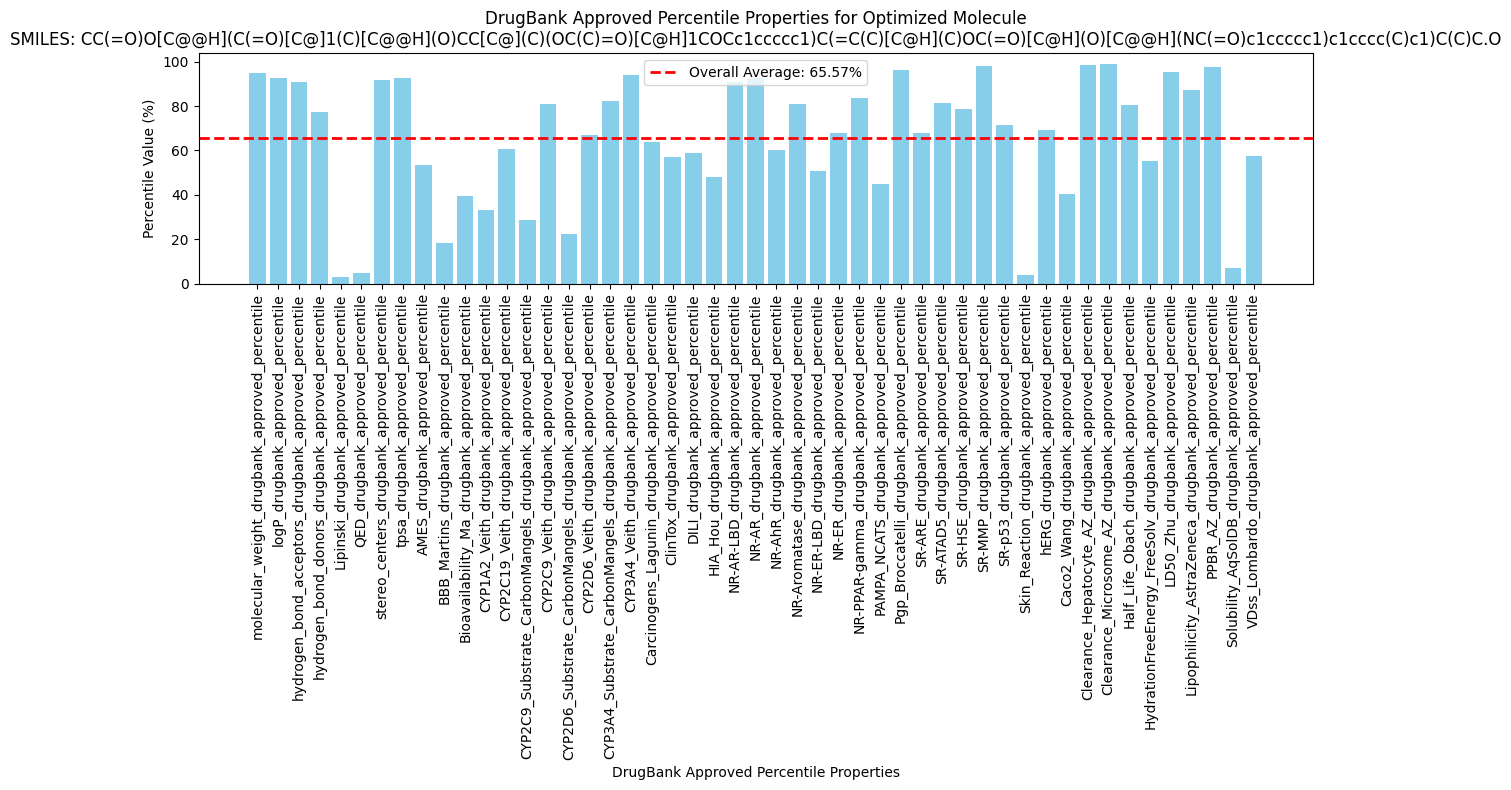

Overall drug-likeness probability (average): 65.57%


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from admet_ai import ADMETModel

# Ensure that best_smiles (the optimized molecule's SMILES) is defined
# For example:
# best_smiles = "optimized_SMILES_string_here"
print("Optimized SMILES:", best_smiles)  # Print the optimized SMILES

# Initialize the ADMET-AI model
model = ADMETModel()

# Predict ADMET properties for the optimized molecule (using a list with a single SMILES)
admet_prediction = model.predict(smiles=[best_smiles])

# Check if prediction was successful
if isinstance(admet_prediction, pd.DataFrame) and not admet_prediction.empty:
    # Optionally display the column names to see what properties are available
    print("ADMET Predictions Columns:", admet_prediction.columns.tolist())

    # Filter for columns that contain "drugbank_approved_percentile"
    percentile_cols = [col for col in admet_prediction.columns if "drugbank_approved_percentile" in col]

    if not percentile_cols:
        print("No 'drugbank_approved_percentile' properties found in the predictions.")
    else:
        # Use iloc[0] to get the first (and only) row as a Series
        molecule_percentiles = admet_prediction.iloc[0][percentile_cols]

        # Compute the overall "drug-likeness probability" as the average of these percentiles
        overall_probability = molecule_percentiles.mean()

        # Create the plot
        plt.figure(figsize=(12, 8))
        plt.bar(range(len(percentile_cols)), molecule_percentiles.values, color='skyblue')
        plt.xticks(range(len(percentile_cols)), percentile_cols, rotation=90)
        plt.xlabel("DrugBank Approved Percentile Properties")
        plt.ylabel("Percentile Value (%)")
        plt.title(f"DrugBank Approved Percentile Properties for Optimized Molecule\nSMILES: {best_smiles}")
        plt.axhline(overall_probability, color='red', linestyle='--', linewidth=2,
                    label=f'Overall Average: {overall_probability:.2f}%')
        plt.legend()
        plt.tight_layout()

        # Save the graph as an image file before showing it
        plt.savefig("admet_predictions.png", dpi=300)
        print("Graph saved as 'admet_predictions.png'.")

        # Display the plot
        plt.show()

        print(f"Overall drug-likeness probability (average): {overall_probability:.2f}%")
else:
    print("Error: ADMET prediction failed or returned an empty dataset.")
